In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
datak1 = pd.read_csv("500 cross k1.csv", sep=';')
datak2 = pd.read_csv("500 cross k2.csv", sep=';')
datak3 = pd.read_csv("500 cross k3.csv", sep=';')
datak4 = pd.read_csv("500 cross k4.csv", sep=';')
sns.set()

In [2]:
filtro1 = (datak1['Metodo'] == 1)
filtro2 = (datak1['Metodo'] == 2)
filtro3 = (datak1['Metodo'] == 3)
filtro4 = (datak1['Metodo'] == 4)
data1k1 = datak1.loc[filtro1,:]
data2k1 = datak1.loc[filtro2,:]
data3k1 = datak1.loc[filtro3,:]
data4k1 = datak1.loc[filtro4,:]
data_mean1 = data1k1['MMRE'].expanding().mean()
data_mean2 = data2k1['MMRE'].expanding().mean()
data_mean2.index = range(500)
data_mean3 = data3k1['MMRE'].expanding().mean()
data_mean3.index = range(500)
data_mean4 = data4k1['MMRE'].expanding().mean()
data_mean4.index = range(500)
filtro1 = (datak2['Metodo'] == 1)
filtro2 = (datak2['Metodo'] == 2)
filtro3 = (datak2['Metodo'] == 3)
filtro4 = (datak2['Metodo'] == 4)
data1k2 = datak2.loc[filtro1,:]
data2k2 = datak2.loc[filtro2,:]
data3k2 = datak2.loc[filtro3,:]
data4k2 = datak2.loc[filtro4,:]
filtro1 = (datak3['Metodo'] == 1)
filtro2 = (datak3['Metodo'] == 2)
filtro3 = (datak3['Metodo'] == 3)
filtro4 = (datak3['Metodo'] == 4)
data1k3 = datak3.loc[filtro1,:]
data2k3 = datak3.loc[filtro2,:]
data3k3 = datak3.loc[filtro3,:]
data4k3 = datak3.loc[filtro4,:]
filtro1 = (datak4['Metodo'] == 1)
filtro2 = (datak4['Metodo'] == 2)
filtro3 = (datak4['Metodo'] == 3)
filtro4 = (datak4['Metodo'] == 4)
data1k4 = datak4.loc[filtro1,:]
data2k4 = datak4.loc[filtro2,:]
data3k4 = datak4.loc[filtro3,:]
data4k4 = datak4.loc[filtro4,:]

In [ ]:
datafig2_1 = pd.DataFrame({
'MI_1L':data_mean1,
'mRMR_1L':data_mean2,
'MI_2L':data_mean3,
'mRMR_2L':data_mean4})
datafig2_1.plot(figsize=(16, 8))

In [ ]:
plt.figure(figsize=(15,8))
datafig2 = pd.DataFrame({
'Iteraciones':range(500),
'MI_1L':data_mean1,
'mRMR_1L':data_mean2,
'MI_2L':data_mean3,
'mRMR_2L':data_mean4})
sns.lineplot(data=pd.melt(datafig2, ['Iteraciones'], var_name='Algoritmo', value_name='MMRE media'), x='Iteraciones', y='MMRE media', hue='Algoritmo')

In [ ]:
plt.figure(figsize=(15,15))
sns.boxplot(data=[data1k1['MMRE'], data2k1['MMRE'], data3k1['MMRE'], data4k1['MMRE']])

In [ ]:
#Tolerancia con MI_1L
i = 0
valor_anterior = 0
repeticiones = 0
for index, value in data_mean1.iteritems():
    if abs((valor_anterior / value) - 1) < 0.0003 :
        repeticiones += 1
    else:
        repeticiones = 0
    if repeticiones == 50:
        print('El resultado es', i)
        break
    i += 1
    valor_anterior = value

In [ ]:
#Tabla 4
data_table4 = {'MI_1L':[data1k1['MMRE'].mean(), data1k2['MMRE'].mean(), data1k3['MMRE'].mean(), data1k4['MMRE'].mean()], 'mRMR_1L':[data2k1['MMRE'].mean(), data2k2['MMRE'].mean(), data2k3['MMRE'].mean(), data2k4['MMRE'].mean()], 'MI_2L':[data3k1['MMRE'].mean(), data3k2['MMRE'].mean(), data3k3['MMRE'].mean(), data3k4['MMRE'].mean()], 'mRMR_2L':[data4k1['MMRE'].mean(), data4k2['MMRE'].mean(), data4k3['MMRE'].mean(), data4k4['MMRE'].mean()]}
table4df = pd.DataFrame(data_table4, index=['K = 1', 'K = 2', 'K = 3', 'K = 4'])
table4df

In [ ]:
#Table 5
data_table5 = {'Media':[data1k1['Tiempo'].mean(), data2k1['Tiempo'].mean(), data3k1['Tiempo'].mean(), data4k1['Tiempo'].mean()], 'Desviación Típica':[data1k1['Tiempo'].std(), data2k1['Tiempo'].std(), data3k1['Tiempo'].std(), data4k1['Tiempo'].std()]}
table5df = pd.DataFrame(data_table5, index=['MI_1L', 'mRMR_1L', 'MI_2L', 'mRMR_2L'])
table5df

In [57]:
#Limpieza de las Variables seleccionadas
data_variables = data4k1['Variables Elegidas']
final = list()
for item in data_variables.iteritems():
    aux = list(item[1].split(', '))
    linea = list()
    for word in aux:
        word = word.replace('[', '')
        word = word.replace(']', '')
        word = word.replace("'", '')
        linea.append(word)
    final.append(linea)

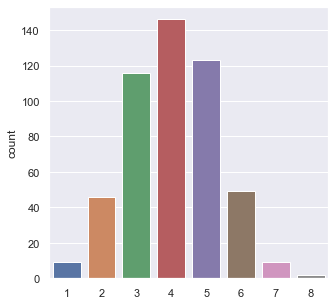

In [58]:
#Figura 6
x = list()
for fila in final:
    x.append(len(fila))
plt.figure(figsize=(5,5))
sns.countplot(x)

In [59]:
print(np.mean(x))
print(np.std(x))

4.042
1.2744551777132063


In [ ]:
#Recuento de las Variables
datatable7 = []
for itera in final:
    try:
        afp = itera.index('Adjusted Function Points') if 'Adjusted Function Points' in itera else 12
        fsz = itera.index('Functional Size') if 'Functional Size' in itera else 12
        pet = itera.index('Project Elapsed Time') if 'Project Elapsed Time' in itera else 12
        ppl = itera.index('Primary Programming Language') if 'Primary Programming Language' in itera else 12 
        ise = itera.index('Industry Sector') if 'Industry Sector' in itera else 12
        dbs = itera.index('1st Data Base System') if '1st Data Base System' in itera else 12
        dpl = itera.index('Development Platform') if 'Development Platform' in itera else 12
        umt = itera.index('Used Methodology') if 'Used Methodology' in itera else 12
        dty = itera.index('Development Type') if 'Development Type' in itera else 12
        lgt = itera.index('Language Type') if 'Language Type' in itera else 12
        agr = itera.index('Application Group') if 'Application Group' in itera else 12
    except:
        pass
    datatable7.append([afp, fsz, pet, ppl, ise, dbs, dpl, umt, dty, lgt, agr])
variablesdf = pd.DataFrame(datatable7, columns=['Adjusted Function Points', 'Functional Size', 'Project Elapsed Time', 'Primary Programming Language', 'Industry Sector', '1st Data Base System', 'Development Platform', 'Used Methodology', 'Development Type', 'Language Type', 'Application Group'])

In [ ]:
#datos tabla 7
variablesdf['Functional Size'].value_counts()
listavariables = ['Adjusted Function Points', 'Functional Size', 'Project Elapsed Time', 'Primary Programming Language', 'Industry Sector', '1st Data Base System', 'Development Platform', 'Used Methodology', 'Development Type', 'Language Type', 'Application Group']
for var in listavariables: 
    print(variablesdf[var].value_counts())